# Scale Up Your Workflows with Φ-Down

![phidown](https://raw.githubusercontent.com/ESA-PhiLab/phidown/869801875854d6a5bfde7f0af6530f6b31cf8388/assets/banner_phidown.svg)

Imagine a world where accessing satellite imagery is as seamless as browsing the web. In this world, you can monitor crops at a continental scale 🌾, forecast climate risks 🌍, and unlock insights that drive innovation. This is the promise of **Φ-Down**.

Built to empower researchers, developers, and data scientists, **Φ-Down** connects you to the **Copernicus Data Space Ecosystem** with ease. Whether you're searching for Sentinel mission data or downloading massive archives, this Python library is your gateway to scalable, high-quality Earth Observation data.

With **Φ-Down**, you can:
- 🔎 **Search and filter** datasets intelligently
- ⚡ **Download data effortlessly** without wrestling with APIs
- 🔗 **Integrate seamlessly** into your workflows

Let Φ-Down handle the infrastructure, so you can focus on discovering insights and scaling innovation.

## · Why this matters ?

Earth Observation data is more than just pixels; it's the foundation of a global market exceeding **$10B**. From insurance to agriculture, energy to logistics, this data fuels industries and drives innovation. But why should you care?

| Benefit | Description |
|---|---|
| **Market Growth** | The demand for Earth observation data is skyrocketing, creating opportunities for businesses to thrive in a data-driven economy. |
| **Competitive Advantage** | Organizations with access to vast datasets can build proprietary models, deliver unique insights, and outpace competitors. |
| **Risk Management** | Predictive analytics powered by large archives help mitigate climate risks, supply chain disruptions, and natural disasters. |
| **Operational Efficiency** | Automating bulk downloads ensures data sovereignty and reduces reliance on third-party platforms. |
| **Innovation & Investment** | Open archives like Copernicus and Landsat enable startups and enterprises to create scalable, data-driven products.

Harnessing this data isn't just about staying ahead; it's about shaping the future.

## 🚀 Getting Started

Embarking on your journey with **Φ-Down** is simple and rewarding. Whether you're a seasoned data scientist or a curious beginner, this notebook will guide you through the essentials of accessing and analyzing Earth Observation data. Let's dive in and unlock the power of satellite imagery together!

### Environment & packages

Before we dive into the data, let's ensure your environment is ready. Installing the necessary packages is a breeze, and once set up, you'll be equipped to explore the vast archives of Earth Observation data. If you're starting fresh, simply uncomment the cell below and let the magic happen!

In [1]:
%pip install --quiet phidown rioxarray rasterio geopandas shapely imageio ipyleaflet folium 

Note: you may need to restart the kernel to use updated packages.


# Search and Exploration

Imagine having the ability to pinpoint satellite imagery tailored to your needs. With **Φ-Down**, this dream becomes a reality. In this section, you'll learn how to search, filter, and explore Sentinel-2 metadata effortlessly. Here's what we'll cover:

- **Setting Search Parameters:**  
    Define your criteria, from collection names to cloud cover thresholds, and specify your area of interest (AOI) in WKT format.

- **Executing the Search:**  
    Use the `CopernicusDataSearcher` to query the Copernicus Open Access Hub and retrieve matching products.

- **Viewing Results:**  
    Load the metadata into a pandas DataFrame (`df`) and inspect key columns like `Id`, `Name`, `S3Path`, and `GeoFootprint`.

By the end of this section, you'll have a clear understanding of how to refine your queries and analyze the results to uncover valuable insights.

In [2]:
import os
import json
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import pandas as pd
import geopandas as gpd 
from shapely.geometry import shape, mapping, Polygon
import folium

import xarray as xr
import rioxarray  # noqa: F401
import imageio.v2 as imageio

# Ensure wider prints
xr.set_options(display_style="html")
from phidown.search import CopernicusDataSearcher
import phidown.viz as viz


You hold the reins to refine your search parameters and tailor the query to your specific needs. Whether you're looking for imagery from a particular date range or focusing on a specific region, **Φ-Down** empowers you to iterate, re-run searches, and dive deeper into the data. The possibilities are endless!

### Sentinel-2 Search

Sentinel-2 is your go-to for high-resolution optical imagery, capturing the Earth's surface in stunning detail. Whether you're monitoring vegetation, analyzing water bodies, or tracking urban growth, Sentinel-2 provides the data you need to make informed decisions. In this section, we'll configure a search to retrieve Sentinel-2 products tailored to your area of interest and specific criteria.

In [3]:
searcher = CopernicusDataSearcher()

aoi_wkt = "POLYGON ((12.350000 41.800000, 12.350000 42.020000, 12.650000 42.020000, 12.650000 41.800000, 12.350000 41.800000))"

# Configure the search parameters
searcher.query_by_filter(
    collection_name='SENTINEL-2',
    product_type=None,
    orbit_direction=None,
    cloud_cover_threshold=0.7,
    aoi_wkt=aoi_wkt,
    start_date = '2024-01-01T00:00:00',
    end_date = '2024-05-05T04:00:00',
    top=1000,
    count=True,  # Set to True to get the total count of results
)

df_s2 = searcher.execute_query()
print(f"Number of results: {len(df_s2)}")
# Display the first few rows of the DataFrame
searcher.display_results(top_n=5)

WKT polygon normalized: Whitespace and formatting corrected
Number of results: 15
Number of results: 15


,Id,Name,S3Path,GeoFootprint,OriginDate,Attributes
0,337298a0-e483-4923-96a1-40393c4a9174,S2A_MSIL1C_20240414T100031_N0510_R122_T33TUG_2...,/eodata/Sentinel-2/MSI/L1C/2024/04/14/S2A_MSIL...,"{'type': 'Polygon', 'coordinates': [[[12.56880...",2024-04-14 16:00:44,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
1,5c3b78af-5c68-44ed-ba55-54fbca103542,S2A_MSIL1C_20240414T100031_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L1C/2024/04/14/S2A_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071...",2024-04-14 16:00:13,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
2,645f6eb5-40d9-41ce-9c97-cd5500c1ed05,S2A_MSIL2A_20240414T100031_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L2A/2024/04/14/S2A_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071...",2024-04-14 17:02:48,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
3,6aa06216-3db4-4ffc-99b8-9fb6cf88d55f,S2A_MSIL2A_20240414T100031_N0510_R122_T33TUG_2...,/eodata/Sentinel-2/MSI/L2A/2024/04/14/S2A_MSIL...,"{'type': 'Polygon', 'coordinates': [[[12.56880...",2024-04-14 17:03:03,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
4,8f87e816-a12c-40ca-b5b3-d6afc0353524,S2A_MSIL1C_20240414T100031_N0510_R122_T33TTG_2...,/eodata/Sentinel-2/MSI/L1C/2024/04/14/S2A_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.35495...",2024-04-14 16:00:15,"[{'@odata.type': '#OData.CSC.StringAttribute',..."


### Sentinel-1 Search

Sentinel-1 offers radar imagery that penetrates clouds and darkness, making it ideal for applications like flood mapping, land deformation studies, and maritime surveillance. In this section, we'll set up a search to access Sentinel-1 products, ensuring you have the data to tackle challenges where optical imagery falls short.

In [4]:
searcher = CopernicusDataSearcher()
# Configure the search parameters
searcher.query_by_filter(
    collection_name='SENTINEL-1',
    product_type=None,
    orbit_direction=None,
    cloud_cover_threshold=None,
    aoi_wkt=aoi_wkt,
    start_date = '2024-01-01T00:00:00',
    end_date = '2024-05-05T04:00:00',
    top=1000,
    count=True,  # Set to True to get the total count of results
)

df_s1 = searcher.execute_query()
print(f"Number of results: {len(df_s1)}")
# Display the first few rows of the DataFrame
searcher.display_results(top_n=5)

WKT polygon normalized: Whitespace and formatting corrected
Number of results: 278
Number of results: 278


,Id,Name,S3Path,GeoFootprint,OriginDate,Attributes
0,facad022-8b46-4f55-a3a9-8f66d2781c43,S1A_IW_SLC__1SDV_20240504T052038_20240504T0521...,/eodata/Sentinel-1/SAR/IW_SLC__1S/2024/05/04/S...,"{'type': 'Polygon', 'coordinates': [[[12.65743...",2024-05-04 06:21:30,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
1,9661f8ee-089c-40d4-9ca2-f63ef8babb26,S1A_IW_ETA__AXDV_20240504T052038_20240504T0521...,/eodata/Sentinel-1/AUX/IW_ETA__AX/2024/05/04/S...,"{'type': 'Polygon', 'coordinates': [[[12.6595,...",2024-05-24 18:46:59,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
2,be01e2e0-3ce5-47c8-819d-008de8421dab,S1A_IW_RAW__0SDV_20240504T052036_20240504T0521...,/eodata/Sentinel-1/SAR/IW_RAW__0S/2024/05/04/S...,"{'type': 'Polygon', 'coordinates': [[[12.6752,...",2024-05-04 05:53:42,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
3,2b8315ba-a181-4000-bd51-7905312d8db8,S1A_IW_GRDH_1SDV_20240504T052015_20240504T0520...,/eodata/Sentinel-1/SAR/IW_GRDH_1S/2024/05/04/S...,"{'type': 'Polygon', 'coordinates': [[[13.06380...",2024-05-04 06:08:15,"[{'@odata.type': '#OData.CSC.StringAttribute',..."
4,8f2a2ae2-9b68-45d2-b726-082a981cb43a,S1A_IW_GRDH_1SDV_20240504T052015_20240504T0520...,/eodata/Sentinel-1/SAR/IW_GRDH_1S-COG/2024/05/...,"{'type': 'Polygon', 'coordinates': [[[13.06380...",2024-05-04 04:15:52,"[{'@odata.type': '#OData.CSC.StringAttribute',..."


### Common Intersections

What happens when two worlds collide? In this case, it's Sentinel-1 and Sentinel-2 datasets intersecting to reveal shared insights. By identifying common dates between these datasets, we can uncover patterns and correlations that might otherwise go unnoticed. Let's explore these intersections and see what stories the data has to tell.

In [5]:
def compute_df_intersection(df1: 'pd.DataFrame', df2: 'pd.DataFrame') -> 'pd.DataFrame':
    """
    Compute intersection between two product DataFrames based on OriginDate (date-only).

    Args:
        df1 (pd.DataFrame): First product DataFrame (e.g., Sentinel-1).
        df2 (pd.DataFrame): Second product DataFrame (e.g., Sentinel-2).

    Returns:
        pd.DataFrame: Merged DataFrame containing product pairs with the same origin_date.
    """
    assert isinstance(df1, pd.DataFrame) and isinstance(df2, pd.DataFrame)
    assert 'OriginDate' in df1.columns and 'OriginDate' in df2.columns

    df1_copy = df1.copy()
    df2_copy = df2.copy()
    df1_copy['origin_date'] = pd.to_datetime(df1_copy['OriginDate']).dt.date
    df2_copy['origin_date'] = pd.to_datetime(df2_copy['OriginDate']).dt.date

    df_merged = pd.merge(
        df1_copy,
        df2_copy,
        on='origin_date',
        how='inner',
        suffixes=('_s1', '_s2')
    )

    # Keep commonly useful columns when available
    cols_keep = ['origin_date']
    for suffix in ('_s1', '_s2'):
        for col in ('Id', 'Name', 'S3Path', 'GeoFootprint'):
            candidate = f'{col}{suffix}'
            if candidate in df_merged.columns:
                cols_keep.append(candidate)

    cols_keep = [c for c in cols_keep if c in df_merged.columns]
    return df_merged[cols_keep]

# Compute intersection DataFrame
df_intersection = compute_df_intersection(df_s1, df_s2)
print(f'Found {len(df_intersection)} matching product pairs on the same Date.')
df_intersection

Found 14 matching product pairs on the same Date.


,origin_date,Id_s1,Name_s1,S3Path_s1,GeoFootprint_s1,Id_s2,Name_s2,S3Path_s2,GeoFootprint_s2
0,2024-03-20,db5c9f35-b5cf-426c-9b91-4dfeaa62138e,S1A_IW_ETA__AXDV_20240229T051225_20240229T0512...,/eodata/Sentinel-1/AUX/IW_ETA__AX/2024/02/29/S...,"{'type': 'Polygon', 'coordinates': [[[14.6876,...",660229f5-1274-4421-a725-8633bc1622fd,S2B_MSIL1C_20240320T095649_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L1C/2024/03/20/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071..."
1,2024-03-20,db5c9f35-b5cf-426c-9b91-4dfeaa62138e,S1A_IW_ETA__AXDV_20240229T051225_20240229T0512...,/eodata/Sentinel-1/AUX/IW_ETA__AX/2024/02/29/S...,"{'type': 'Polygon', 'coordinates': [[[14.6876,...",8757422b-7381-4729-a07b-587033662a10,S2B_MSIL1C_20240320T095649_N0510_R122_T33TTG_2...,/eodata/Sentinel-2/MSI/L1C/2024/03/20/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.35495..."
2,2024-03-20,f70816ad-0d64-4fc8-8311-17bbc1731ea5,S1A_IW_ETA__AXDV_20240229T051200_20240229T0512...,/eodata/Sentinel-1/AUX/IW_ETA__AX/2024/02/29/S...,"{'type': 'Polygon', 'coordinates': [[[15.068, ...",660229f5-1274-4421-a725-8633bc1622fd,S2B_MSIL1C_20240320T095649_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L1C/2024/03/20/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071..."
3,2024-03-20,f70816ad-0d64-4fc8-8311-17bbc1731ea5,S1A_IW_ETA__AXDV_20240229T051200_20240229T0512...,/eodata/Sentinel-1/AUX/IW_ETA__AX/2024/02/29/S...,"{'type': 'Polygon', 'coordinates': [[[15.068, ...",8757422b-7381-4729-a07b-587033662a10,S2B_MSIL1C_20240320T095649_N0510_R122_T33TTG_2...,/eodata/Sentinel-2/MSI/L1C/2024/03/20/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.35495..."
4,2024-01-30,3292749d-2f4d-4182-955f-52f9d56f6f19,S1A_IW_GRDH_1SDV_20240130T170607_20240130T1706...,/eodata/Sentinel-1/SAR/IW_GRDH_1S-COG/2024/01/...,"{'type': 'Polygon', 'coordinates': [[[11.09796...",6086efae-3f90-4ffe-9b20-a40129d39b07,S2B_MSIL1C_20240130T100149_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L1C/2024/01/30/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071..."
5,2024-01-30,3292749d-2f4d-4182-955f-52f9d56f6f19,S1A_IW_GRDH_1SDV_20240130T170607_20240130T1706...,/eodata/Sentinel-1/SAR/IW_GRDH_1S-COG/2024/01/...,"{'type': 'Polygon', 'coordinates': [[[11.09796...",c019adf4-224f-4ce2-a85a-2399b96c54be,S2B_MSIL1C_20240130T100149_N0510_R122_T33TTG_2...,/eodata/Sentinel-2/MSI/L1C/2024/01/30/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.35495..."
6,2024-01-30,66ae7e56-cce8-4c11-8e24-4ec59abe16df,S1A_IW_GRDH_1SDV_20240130T170607_20240130T1706...,/eodata/Sentinel-1/SAR/IW_GRDH_1S/2024/01/30/S...,"{'type': 'Polygon', 'coordinates': [[[11.09796...",6086efae-3f90-4ffe-9b20-a40129d39b07,S2B_MSIL1C_20240130T100149_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L1C/2024/01/30/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071..."
7,2024-01-30,66ae7e56-cce8-4c11-8e24-4ec59abe16df,S1A_IW_GRDH_1SDV_20240130T170607_20240130T1706...,/eodata/Sentinel-1/SAR/IW_GRDH_1S/2024/01/30/S...,"{'type': 'Polygon', 'coordinates': [[[11.09796...",c019adf4-224f-4ce2-a85a-2399b96c54be,S2B_MSIL1C_20240130T100149_N0510_R122_T33TTG_2...,/eodata/Sentinel-2/MSI/L1C/2024/01/30/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.35495..."
8,2024-01-30,c890c74c-904a-468b-bd1f-080a8853b33d,S1A_IW_OCN__2SDV_20240130T170607_20240130T1706...,/eodata/Sentinel-1/SAR/IW_OCN__2S/2024/01/30/S...,"{'type': 'Polygon', 'coordinates': [[[11.09796...",6086efae-3f90-4ffe-9b20-a40129d39b07,S2B_MSIL1C_20240130T100149_N0510_R122_T32TQM_2...,/eodata/Sentinel-2/MSI/L1C/2024/01/30/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.43071..."
9,2024-01-30,c890c74c-904a-468b-bd1f-080a8853b33d,S1A_IW_OCN__2SDV_20240130T170607_20240130T1706...,/eodata/Sentinel-1/SAR/IW_OCN__2S/2024/01/30/S...,"{'type': 'Polygon', 'coordinates': [[[11.09796...",c019adf4-224f-4ce2-a85a-2399b96c54be,S2B_MSIL1C_20240130T100149_N0510_R122_T33TTG_2...,/eodata/Sentinel-2/MSI/L1C/2024/01/30/S2B_MSIL...,"{'type': 'Polygon', 'coordinates': [[[11.35495..

### Plotting Functions Definition

Visualizing data is where insights come to life. In this section, we define powerful plotting functions that transform raw geometries into interactive maps. These functions leverage the Folium library to create dynamic visualizations, enabling you to explore spatial data intuitively. Whether you're overlaying polygons or zooming into specific areas, these tools make your data exploration seamless and engaging.

In [6]:
from typing import List, Dict, Optional, Tuple
import folium
from folium.plugins import MiniMap, Fullscreen, MousePosition, MeasureControl
from shapely.geometry import shape, mapping
from shapely.ops import unary_union

# Optional Scale plugin (robust to older Folium versions)
try:
    from folium.plugins import Scale
    _HAS_SCALE_PLUGIN = True
except Exception:
    _HAS_SCALE_PLUGIN = False


def poly2map(
    polygons: List[Dict],
    map_location: Optional[Tuple[float, float]] = None,
    zoom_start: int = 8,
    popup_field: str = 'name',
    color_palette: Optional[List[str]] = None,
    save_html: Optional[str] = None,
) -> 'folium.Map':
    """
    Create a Folium map with polygon geometries provided as GeoJSON-like dictionaries.
    Default basemap: Carto Light (positron). Layer control on the left. Tooltip only (no popup on click).
    """
    assert isinstance(polygons, list) and len(polygons) > 0, 'polygons must be a non-empty list'
    color_palette = color_palette or ['#30638E', '#D1495B', '#00798C', '#EDAE49', '#7A7D7D', '#4E8E2C']

    # Parse geometries and names
    shapely_geoms, names = [], []
    for idx, item in enumerate(polygons):
        assert isinstance(item, dict), f'item at index {idx} must be a dict'
        geom_dict = item.get('geometry') if 'geometry' in item else item
        assert (
            isinstance(geom_dict, dict) and geom_dict.get('type', '').lower() == 'polygon'
        ), f'item at index {idx} must contain a Polygon geometry dict'

        g = shape(geom_dict)
        assert g.is_valid, f'geometry at index {idx} is not a valid polygon'

        # Prefer top-level 'name'
        name = (
            item.get('name')
            or item.get(popup_field)
            or (item.get('properties') or {}).get(popup_field)
            or item.get('title')
            or f'Polygon {idx}'
        )
        shapely_geoms.append(g)
        names.append(str(name))

    # Centering / map init
    if map_location:
        center_lat, center_lon = map_location
    else:
        union = unary_union(shapely_geoms)
        minx, miny, maxx, maxy = union.bounds
        center_lat = (miny + maxy) / 2.0
        center_lon = (minx + maxx) / 2.0

    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=zoom_start,
        tiles=None,
        control_scale=(not _HAS_SCALE_PLUGIN),
    )

    # Basemaps — Carto Light default
    folium.TileLayer('CartoDB positron', name='Carto Light', control=True, show=True).add_to(m)
    folium.TileLayer('CartoDB dark_matter', name='Carto Dark', control=True, show=False).add_to(m)
    folium.TileLayer('Stamen Terrain', name='Stamen Terrain', control=True, show=False, attr='Stamen').add_to(m)
    folium.TileLayer('Stamen Toner', name='Stamen Toner', control=True, show=False, attr='Stamen').add_to(m)
    folium.TileLayer('Stamen Watercolor', name='Stamen Watercolor', control=True, show=False, attr='Stamen').add_to(m)

    # Add polygons with styling and hover highlight (no popup)
    gj_group = folium.FeatureGroup(name='Polygons', show=True)
    for i, (geom, name) in enumerate(zip(shapely_geoms, names)):
        color = color_palette[i % len(color_palette)]
        geojson = mapping(geom)

        gj = folium.GeoJson(
            geojson,
            name=name,
            style_function=(lambda col: (lambda _feature: {
                'fillColor': col,
                'color': col,
                'weight': 2,
                'fillOpacity': 0.35,
            }))(color),
            highlight_function=lambda _feature, col=color: {
                'weight': 4,
                'color': col,
                'fillOpacity': 0.55,
            },
        )
        folium.Tooltip(name, sticky=True).add_to(gj)  # tooltip only
        gj.add_to(gj_group)

    gj_group.add_to(m)

    # UX / cartographic helpers
    MiniMap(toggle_display=True).add_to(m)
    Fullscreen(position='topright').add_to(m)
    folium.map.LayerControl(collapsed=False, position='topleft').add_to(m)
    MousePosition(position='bottomleft', prefix='Lat/Lon:', separator=' , ', num_digits=5).add_to(m)
    MeasureControl(primary_length_unit='kilometers', primary_area_unit='sqmeters').add_to(m)
    if _HAS_SCALE_PLUGIN:
        Scale(position='bottomright', imperial=False, metric=True).add_to(m)

    # Fit to polygons if no explicit location
    if not map_location:
        union = unary_union(shapely_geoms)
        minx, miny, maxx, maxy = union.bounds
        m.fit_bounds([[miny, minx], [maxy, maxx]])

    if save_html:
        m.save(save_html)
        print(f'Saved folium map to {save_html}')

    return m

In [8]:
IDX = 5
poly1, poly2 = df_intersection.iloc[IDX]['GeoFootprint_s1'], df_intersection.iloc[IDX]['GeoFootprint_s2']
name1, name2 = df_intersection.iloc[IDX]['Name_s1'], df_intersection.iloc[IDX]['Name_s2']

poly1 = json.loads(poly1) if isinstance(poly1, str) else poly1
poly2 = json.loads(poly2) if isinstance(poly2, str) else poly2
poly1['name'] = name1
poly2['name'] = name2

m = poly2map(
    [poly1, poly2],
    map_location=(41.90, 12.50),  # Center over Rome
    zoom_start=8,
    popup_field='ID',
    color_palette=['#1f77b4', '#ff7f0e'],
    save_html=None,
)

In [11]:
m

## 📥 Download Your Products

The final step in your journey is downloading the products you've identified. With **Φ-Down**, this process is streamlined and secure. Remember, managing your credentials is crucial to maintaining security. If your credentials aren't automatically revoked, take a moment to clean them up manually:

🔗 Manage S3 Credentials: https://eodata-s3keysmanager.dataspace.copernicus.eu/panel/s3-credentials

Stay safe and enjoy the fruits of your exploration!

In [ ]:
from phidown.search import CopernicusDataSearcher

searcher = CopernicusDataSearcher() 

for p in [poly1, poly2]:
    filename = p.get('name')
    if not filename:
        raise ValueError("Polygon must have a 'name' field")
    print(f'Downloading product: {filename}!')
    searcher.download_product(filename, output_dir='./out/')

### Product Visualization: Sentinel-2

Satellite imagery is more than just data—it’s a window into the Earth’s dynamic systems. In this section, we bring Sentinel-2 imagery to life by creating an RGB composite. This visualization combines the red, green, and blue bands to produce a true-color representation, allowing you to explore the landscape as if you were viewing it from space. Let’s dive into the beauty of Earth through Sentinel-2’s lens!

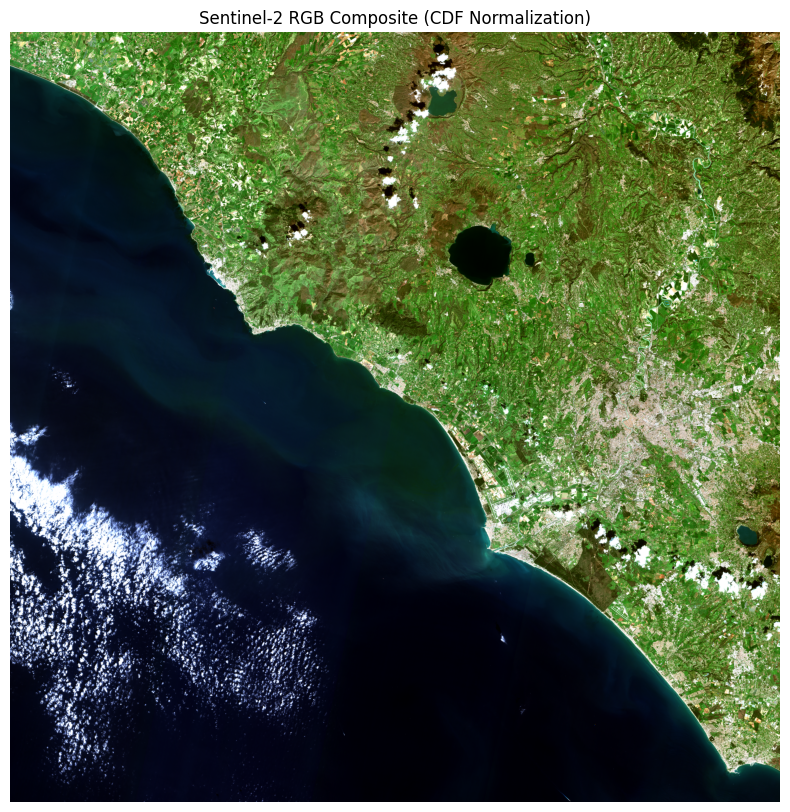

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# File paths for the bands
band_paths = {
    'red': './out/S2B_MSIL1C_20240320T095649_N0510_R122_T32TQM_20240320T120139.SAFE/GRANULE/L1C_T32TQM_A036756_20240320T100108/IMG_DATA/T32TQM_20240320T095649_B04.jp2',
    'green': './out/S2B_MSIL1C_20240320T095649_N0510_R122_T32TQM_20240320T120139.SAFE/GRANULE/L1C_T32TQM_A036756_20240320T100108/IMG_DATA/T32TQM_20240320T095649_B03.jp2',
    'blue': './out/S2B_MSIL1C_20240320T095649_N0510_R122_T32TQM_20240320T120139.SAFE/GRANULE/L1C_T32TQM_A036756_20240320T100108/IMG_DATA/T32TQM_20240320T095649_B02.jp2'
}

# Read bands
bands = {}
for color, path in band_paths.items():
    with rasterio.open(path) as src:
        bands[color] = src.read(1)

# Normalize bands using CDF percentiles 5 and 96
def normalize_band_cdf(band, lower_percentile=5, upper_percentile=96):
    lower = np.percentile(band, lower_percentile)
    upper = np.percentile(band, upper_percentile)
    band_clipped = np.clip(band, lower, upper)
    return (band_clipped - lower) / (upper - lower)

red = normalize_band_cdf(bands['red'])
green = normalize_band_cdf(bands['green'])
blue = normalize_band_cdf(bands['blue'])

# Create RGB composite
rgb = np.dstack((red, green, blue))

# Display the RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('Sentinel-2 RGB Composite (CDF Normalization)')
plt.axis('off')
plt.show()